# 图像连通组件标记与分析

## 连通组件标记算法介绍

连接组件标记算法(connected component labeling algorithm)是图像分析中最常用的算法之一，算法的实质是扫描一幅图像的每个像素，对于像素值相同的分为相同的组(group),最终得到图像中所有的像素连通组件。扫描的方式可以是从上到下，从左到右，对于一幅有N个像素的图像来说，最大连通组件个数为N/2。扫描是基于每个像素单位，对于二值图像而言，连通组件集合可以是V={1|白色}或者V={0|黑色}, 取决于前景色与背景色的不同。对于灰度图像来说，连图组件像素集合可能是一系列在0 ～ 255之间k的灰度值。常见的连通组件标记算法非为两类 
1. 基于无向图搜索递归算法 
2. 基于无向图搜索与堆栈非递归算法 
3. 两步法，基于扫描与等价类合并算法

## OpenCV中连通组件标记API

```C++
int cv::connectedComponents(
InputArray  image, // 输入二值图像，黑色背景
OutputArray     labels, // 输出的标记图像，背景index=0
int     connectivity = 8, // 连通域，默认是8连通
int     ltype = CV_32S // 输出的labels类型，默认是CV_32S
)   
```
带有统计信息的API及其解释如下：

```C++
int cv::connectedComponentsWithStats(
InputArray  image, // 输入二值图像，黑色背景
OutputArray     labels, // 输出的标记图像，背景index=0
OutputArray     stats, // 统计信息，包括每个组件的位置、宽、高与面积
OutputArray     centroids, // 每个组件的中心位置坐标cx, cy
int     connectivity, // 寻找连通组件算法的连通域，默认是8连通
int     ltype, // 输出的labels的Mat类型CV_32S
int     ccltype // 连通组件算法
)
```

其中stats包括以下枚举类型数据信息： 
- CC_STAT_LEFT 
组件的左上角点像素点坐标的X位置. 
- CC_STAT_TOP 
组件的左上角点像素点坐标的Y位置. 
- CC_STAT_WIDTH 
组件外接矩形的宽度 
- CC_STAT_HEIGHT 
组件外接矩形的高度. 
- CC_STAT_AREA 
当前连通组件的面积（像素单位）

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import skimage
import skimage.io
import imageio

In [2]:
src = imageio.imread('../datas/rice.jpg')

In [4]:
def connected_component(src):
    gray = cv2.cvtColor(src,cv2.COLOR_RGB2GRAY)
    _,binary = cv2.threshold(gray,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
    binary = cv2.morphologyEx(binary,cv2.MORPH_OPEN,kernel)
    binary = cv2.morphologyEx(binary,cv2.MORPH_CLOSE,kernel)
    num_labels,labels = cv2.connectedComponents(binary,8,cv2.CV_32S)
    colors = []
    for i in range(num_labels):
        r = np.random.randint(0,255)
        g = np.random.randint(0,255)
        b = np.random.randint(0,255)
        colors.append((r,g,b))
    colors = np.array(colors)
    dst = np.zeros_like(src)
    rows,cols = gray.shape
    for i in range(rows):
        for j in range(cols):
            label = labels[i,j]
            if label != 0:
                dst[i,j] = colors[label]
    return dst,num_labels,labels

In [5]:
dst,_,_ = connected_component(src)

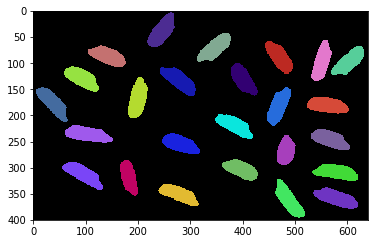

In [6]:
plt.imshow(dst,'gray')

In [35]:
def connected_component_stats(src):
    gray = cv2.cvtColor(src,cv2.COLOR_RGB2GRAY)
    _,binary = cv2.threshold(gray,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
    binary = cv2.morphologyEx(binary,cv2.MORPH_OPEN,kernel)
    binary = cv2.morphologyEx(binary,cv2.MORPH_CLOSE,kernel)
    retval, labels, stats, centroids = cv2.connectedComponentsWithStats(binary,8,4)
    colors = []
    for i in range(retval):
        r = np.random.randint(0,255)
        g = np.random.randint(0,255)
        b = np.random.randint(0,255)
        colors.append((r,g,b))
#     print(centroids[0])
    print(stats[1])
    dst = src.copy()
    for i in range(retval):
        cx,cy = centroids[i]
        x = stats[i][cv2.CC_STAT_LEFT]
        y = stats[i][cv2.CC_STAT_TOP]
        width = stats[i][cv2.CC_STAT_WIDTH]
        height = stats[i][cv2.CC_STAT_HEIGHT]
        cv2.rectangle(dst,(x,y),(x + width,y + height),(0,255,0),2,8,0)
        cv2.circle(dst,(int(cx),int(cy)),5,(255,0,0),-1)
    return dst

In [36]:
dst = connected_component_stats(src)

[ 218    4   53   67 2018]


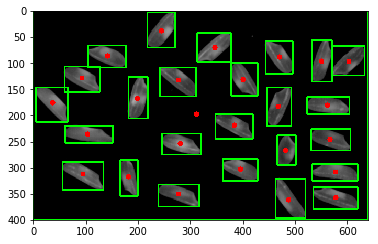

In [37]:
plt.imshow(dst)

参考：

[1]. https://blog.csdn.net/jia20003/article/details/80662396